<a href="https://colab.research.google.com/github/omaralsabbah/Fraud/blob/main/Fraud_detection_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#importing data manipulation lib
import pandas as pd
import numpy as np


# importing data visualization lib
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#loading data
filepath="/content/fraud.csv"
data=pd.read_csv(filepath)
data.head()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594643 entries, 0 to 594642
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   step         594643 non-null  int64  
 1   customer     594643 non-null  object 
 2   age          594643 non-null  object 
 3   gender       594643 non-null  object 
 4   zipcodeOri   594643 non-null  object 
 5   merchant     594643 non-null  object 
 6   zipMerchant  594643 non-null  object 
 7   category     594643 non-null  object 
 8   amount       594643 non-null  float64
 9   fraud        594643 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 45.4+ MB


In [5]:
#Summary for the categorical data
data.describe(include="O")


,customer,age,gender,zipcodeOri,merchant,zipMerchant,category
count,594643,594643,594643,594643,594643,594643,594643
unique,4112,8,4,1,50,1,15
top,'C1978250683','2','F','28007','M1823072687','28007','es_transportation'
freq,265,187310,324565,594643,299693,594643,505119


In [6]:
#summary for numerical data
data.describe()

,step,amount,fraud
count,594643.000000,594643.000000,594643.000000
mean,94.986827,37.890135,0.012108
std,51.053632,111.402831,0.109369
min,0.000000,0.000000,0.000000
25%,52.000000,13.740000,0.000000
50%,97.000000,26.900000,0.000000
75%,139.000000,42.540000,0.000000
max,179.000000,8329.960000,1.000000


In [7]:
#exploring misisng values
data.isnull().sum()

step           0
customer       0
age            0
gender         0
zipcodeOri     0
merchant       0
zipMerchant    0
category       0
amount         0
fraud          0
dtype: int64

In [8]:
#exploring the target variable distribution
data["fraud"].value_counts()

0    587443
1      7200
Name: fraud, dtype: int64

In [9]:
data["fraud"].value_counts(normalize=True)

0    0.987892
1    0.012108
Name: fraud, dtype: float64

As seen above this is a binary classification problem and the dataset is highly imbalanced and we might need an oversampling technique to get good accuracy in predicting both classes.

# **EDA**

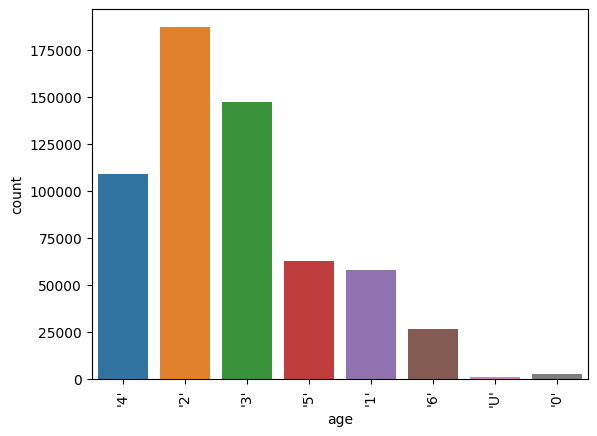

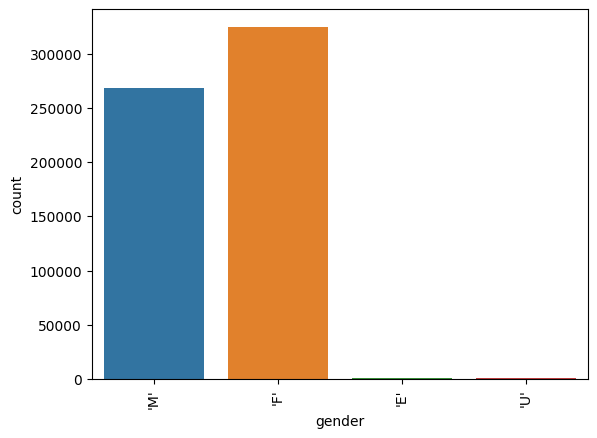

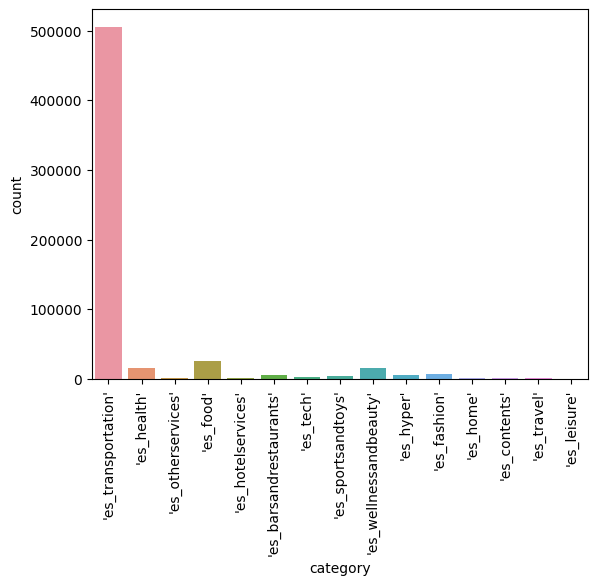

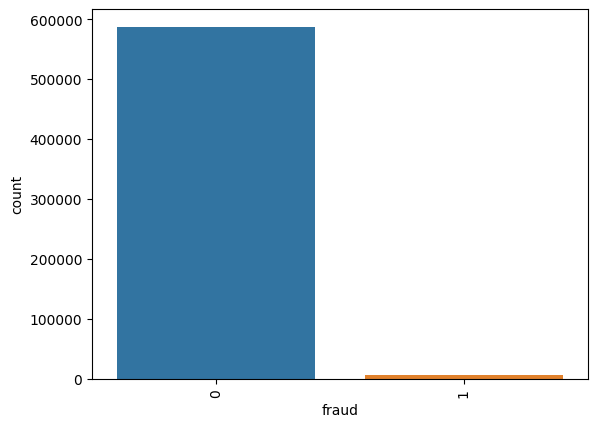

In [10]:
#Exploring distibutions through some visuals
for i, variable in enumerate(data[['age','gender','category','fraud']]):
  plt.figure(i)
  sns.countplot(data=data,x=data[variable])
  plt.xticks(rotation=90)

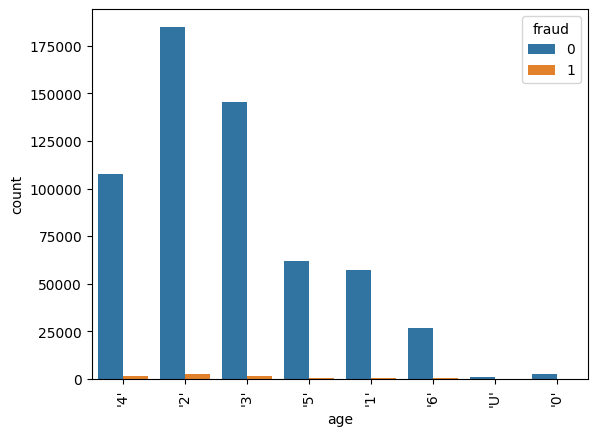

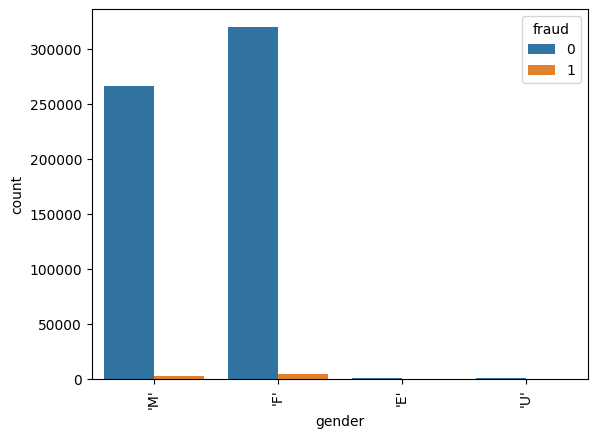

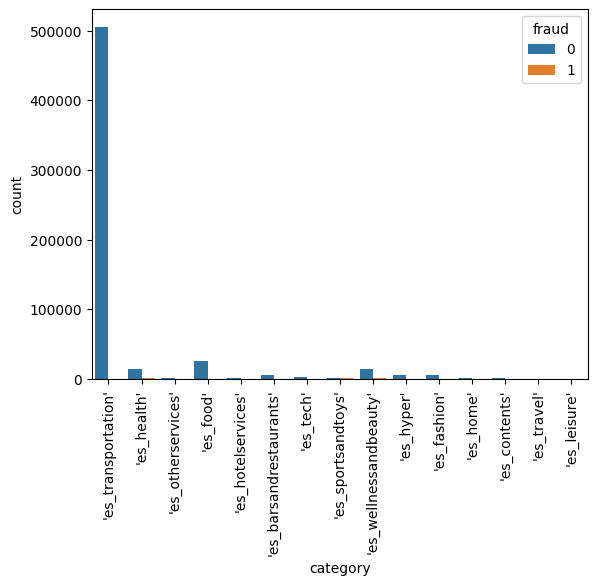

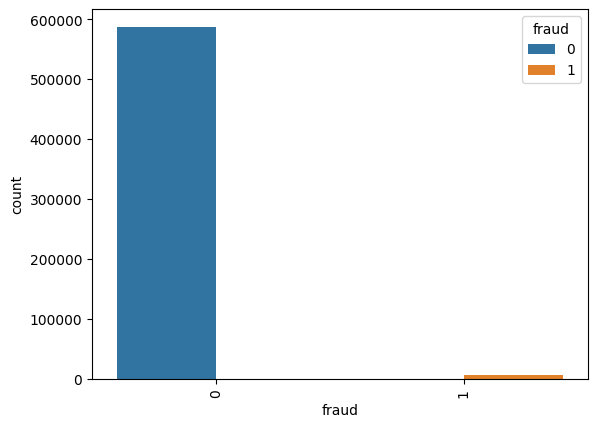

In [11]:
#Adding Hue to do bivariate analysis to discovoer if there are relations with the target variable
for i, variable in enumerate(data[['age','gender','category','fraud']]):
  plt.figure(i)
  sns.countplot(data=data,x=data[variable],hue='fraud')
  plt.xticks(rotation=90)

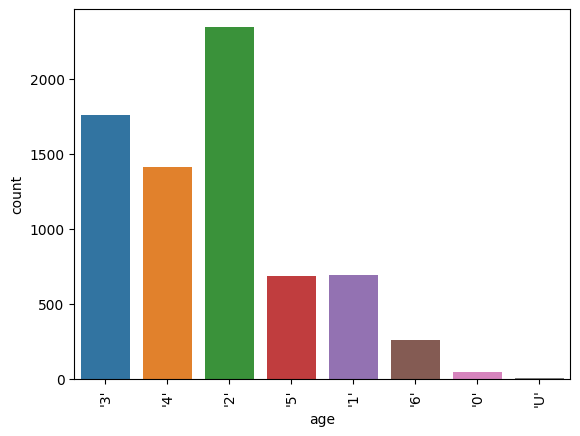

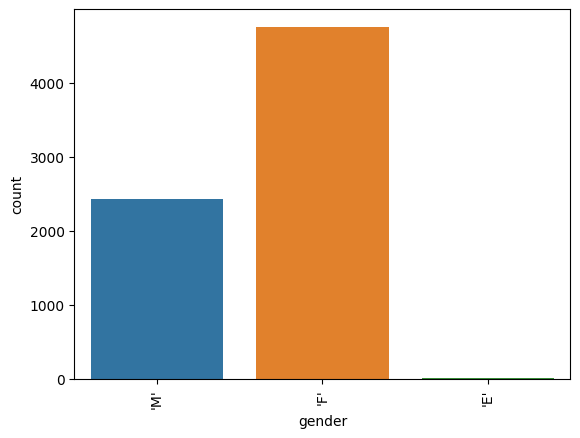

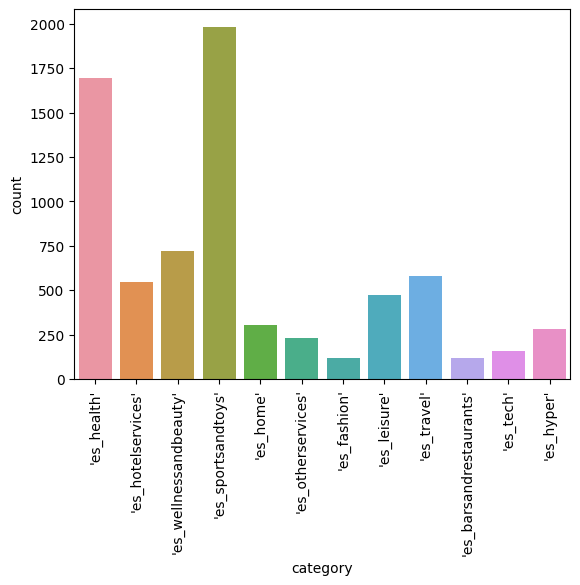

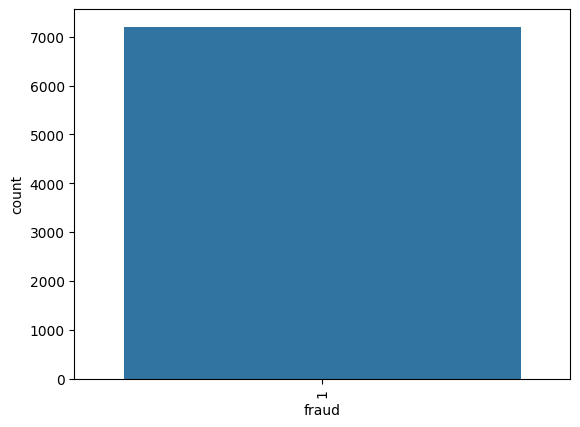

In [12]:
#splitting the data set to amke the analysis of the lower class clearer
data_fraud=data[data['fraud']==1].copy()

for i, variable in enumerate(data_fraud[['age','gender','category','fraud']]):
  plt.figure(i)
  sns.countplot(data=data_fraud,x=data_fraud[variable])
  plt.xticks(rotation=90)

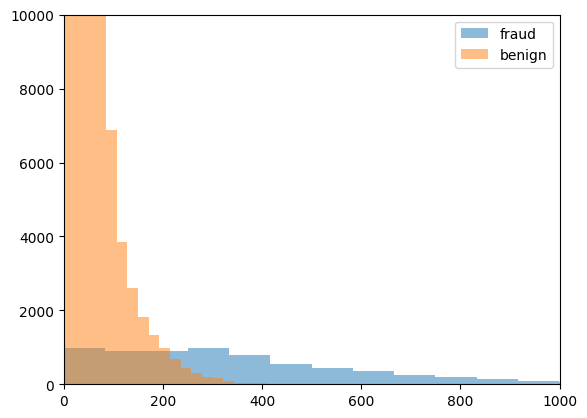

In [13]:
#analysis on the numerical variable "amount"
data_benign=data[data["fraud"]==0].copy()

plt.hist(data_fraud["amount"], alpha=0.5, label='fraud',bins=100)
plt.hist(data_benign["amount"], alpha=0.5, label='benign',bins=100)
plt.ylim(0,10000)
plt.xlim(0,1000)
plt.legend()
plt.show()

# Data preprocessing & feature engineering

In [14]:
#selecting relevant features
data=data.drop(['zipcodeOri','zipMerchant'],axis=1)
data.head()

,step,customer,age,gender,merchant,category,amount,fraud
0,0,'C1093826151','4','M','M348934600','es_transportation',4.55,0
1,0,'C352968107','2','M','M348934600','es_transportation',39.68,0
2,0,'C2054744914','4','F','M1823072687','es_transportation',26.89,0
3,0,'C1760612790','3','M','M348934600','es_transportation',17.25,0
4,0,'C757503768','5','M','M348934600','es_transportation',35.72,0


In [15]:
data.columns

Index(['step', 'customer', 'age', 'gender', 'merchant', 'category', 'amount',
       'fraud'],
      dtype='object')

In [16]:
#to avoid curse of dimensionality becasue of the very high number of categories in some features, I will use one-hot encoding for some features , and use label encoding for others like step and customer

from sklearn.preprocessing import LabelEncoder

# Initialize the label encoders for each column
le_customer = LabelEncoder()
le_merchant = LabelEncoder()

# Apply label encoding to each column separately
data['customer_encoded'] = le_customer.fit_transform(data['customer'])
data['merchant_encoded'] = le_merchant.fit_transform(data['merchant'])

data.head(10)

,step,customer,age,gender,merchant,category,amount,fraud,customer_encoded,merchant_encoded
0,0,'C1093826151','4','M','M348934600','es_transportation',4.55,0,210,30
1,0,'C352968107','2','M','M348934600','es_transportation',39.68,0,2753,30
2,0,'C2054744914','4','F','M1823072687','es_transportation',26.89,0,2285,18
3,0,'C1760612790','3','M','M348934600','es_transportation',17.25,0,1650,30
4,0,'C757503768','5','M','M348934600','es_transportation',35.72,0,3585,30
5,0,'C1315400589','3','F','M348934600','es_transportation',25.81,0,694,30
6,0,'C765155274','1','F','M348934600','es_transportation',9.10,0,3609,30
7,0,'C202531238','4','F','M348934600','es_transportation',21.17,0,2227,30
8,0,'C105845174','3','M','M348934600','es_transportation',32.40,0,126,30
9,0,'C39858251','5','F','M348934600','es_transportation',35.40,0,2853,30


In [17]:
#now with the one-hot encoding
encoded_df = pd.get_dummies(data, columns=['age','gender','category'],drop_first=True).drop(columns=['customer','merchant'],axis=1)
print(encoded_df.shape)
encoded_df.head(10)

(594643, 29)


,step,amount,fraud,customer_encoded,merchant_encoded,age_'1',age_'2',age_'3',age_'4',age_'5',...,category_'es_home',category_'es_hotelservices',category_'es_hyper',category_'es_leisure',category_'es_otherservices',category_'es_sportsandtoys',category_'es_tech',category_'es_transportation',category_'es_travel',category_'es_wellnessandbeauty'
0,0,4.55,0,210,30,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,0,39.68,0,2753,30,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,26.89,0,2285,18,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,17.25,0,1650,30,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,35.72,0,3585,30,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
5,0,25.81,0,694,30,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
6,0,9.10,0,3609,30,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7,0,21.17,0,2227,30,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
8,0,32.40,0,126,30,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
9,0,35.40,0,2853,30,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [18]:
#splitting data and scaling numerical variables
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X=encoded_df.drop('fraud',axis=1)
y=encoded_df['fraud']

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42,test_size=0.3,stratify=y)

y_test.shape, X_train.shape

((178393,), (416250, 28))

In [19]:
scaler = StandardScaler()


X_train['amount'] = scaler.fit_transform(X_train[['amount']])
X_test['amount'] = scaler.transform(X_test[['amount']])

# **Model **

#I am going to examine more than one classification ML model and continue with the one with best results

In [20]:
#importing needed libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#applying logistic regression model
LR = LogisticRegression(random_state=1,max_iter=1500)
LR.fit(X_train,y_train)
y_pred1=LR.predict(X_test)

In [21]:
#evaluating first model
print("Accuracy Score =",accuracy_score(y_test,y_pred1))
print("confusion matrix:\n",confusion_matrix(y_test,y_pred1))

print(classification_report(y_test,y_pred1,labels=[0,1]))

Accuracy Score = 0.9944728772989971
confusion matrix:
 [[176066    167]
 [   819   1341]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    176233
           1       0.89      0.62      0.73      2160

    accuracy                           0.99    178393
   macro avg       0.94      0.81      0.86    178393
weighted avg       0.99      0.99      0.99    178393



In [22]:
#applying KNN model

KNN=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
KNN.fit(X_train, y_train)
y_pred2=KNN.predict(X_test)

In [23]:
#evaluating 2nd model
print("Accuracy Score =",accuracy_score(y_test,y_pred2))
print("confusion matrix:\n",confusion_matrix(y_test,y_pred2))

print(classification_report(y_test,y_pred2,labels=[0,1]))

Accuracy Score = 0.9887327417555621
confusion matrix:
 [[176152     81]
 [  1929    231]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    176233
           1       0.74      0.11      0.19      2160

    accuracy                           0.99    178393
   macro avg       0.86      0.55      0.59    178393
weighted avg       0.99      0.99      0.98    178393



In [24]:
#applying random forest model

RF=RandomForestClassifier(random_state=1)
RF.fit(X_train,y_train)
y_pred3=RF.predict(X_test)

In [25]:
#evaluating RF model
print("Accuracy Score =",accuracy_score(y_test,y_pred3))
print("confusion matrix:\n",confusion_matrix(y_test,y_pred3))

print(classification_report(y_test,y_pred3,labels=[0,1]))

Accuracy Score = 0.9958630663759228
confusion matrix:
 [[176031    202]
 [   536   1624]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    176233
           1       0.89      0.75      0.81      2160

    accuracy                           1.00    178393
   macro avg       0.94      0.88      0.91    178393
weighted avg       1.00      1.00      1.00    178393



As shown in the cells above the overall accuracy is high but the accuracy score cannot be reliable in the case of imbalanced data.

and the models are not performing well in predicting the lower class labels, and over sampling technique is needed to solve this issue

**I will select Random forest classifier to continue with**

In [26]:
#Oversampling with SMOTE
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_resample, y_resample = sm.fit_resample(X, y)

print(y_resample.value_counts())


0    587443
1    587443
Name: fraud, dtype: int64


In [28]:
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_resample,y_resample,random_state=42,test_size=0.30,stratify=y_resample)

Now we can see that the number of data points with both labels is the same, and overcome the imbalance


In [29]:
#Now I will re train the RF model on the new samples


RF2 = RandomForestClassifier(random_state=1)
RF2.fit(Xr_train, yr_train)
y_pred_res=RF2.predict(Xr_test)


In [33]:
#evaluating RF2 model
print("Accuracy Score =",accuracy_score(yr_test,y_pred_res))
print("confusion matrix:\n",confusion_matrix(yr_test,y_pred_res))

print(classification_report(yr_test,y_pred_res,labels=[0,1],digits=4))

Accuracy Score = 0.9977785091327958
confusion matrix:
 [[175818    415]
 [   368 175865]]
              precision    recall  f1-score   support

           0     0.9979    0.9976    0.9978    176233
           1     0.9976    0.9979    0.9978    176233

    accuracy                         0.9978    352466
   macro avg     0.9978    0.9978    0.9978    352466
weighted avg     0.9978    0.9978    0.9978    352466



In [35]:
#features importance
feature_importance_scores = RF2.feature_importances_


In [37]:
feature_importance_df = pd.DataFrame({'Feature': Xr_train.columns, 'Importance': feature_importance_scores})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

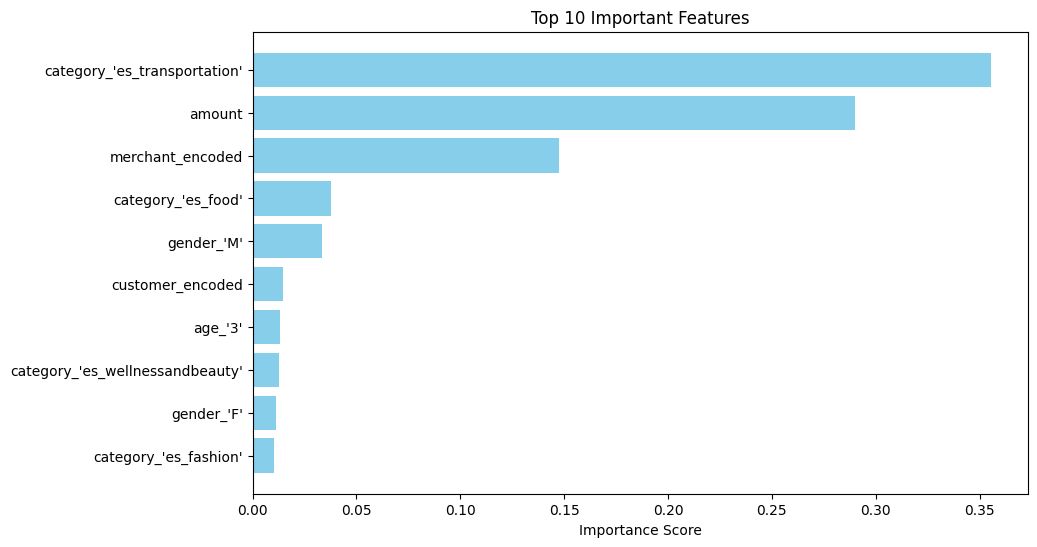

In [38]:
N = 10
top_features = feature_importance_df.head(N)

plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.title(f'Top {N} Important Features')
plt.gca().invert_yaxis()
plt.show()
